In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
from Higgs.tools import ImplementationUtils as impl
from scipy.signal import savgol_filter

## LHC13 top-associated Higgs production XS parameterised in terms of ct, ct~, and cV

The Coefficients were extracted from a LO MG5 calculation in the Higgs characterization model. The tWH cxn is the result of the same LO calculation.

In [52]:
tHMassGrid = np.array([x[0] for x in np.load('data/ttH_mu_fit.npy', allow_pickle=True)])
ttHCoeffs = np.array([x[1]['cttilde2'] for x in np.load('data/ttH_mu_fit.npy', allow_pickle=True)])
tHCoeffs = np.array([[x[1]['ct2'], x[1]['cttilde2'], x[1]['cV2'], x[1]['cvct']] for x in np.load('data/tH_mu_fit.npy', allow_pickle=True)])
tWHCxnsLHC13 = np.array([x[1][0] for x in np.load('data/tWH_mu_fit.npy', allow_pickle=True)])
tWHCoeffs = np.array([[x[1][1]['ct2'], x[1][1]['cttilde2'], x[1][1]['cV2'], x[1][1]['cvct']] for x in np.load('data/tWH_mu_fit.npy', allow_pickle=True)])

In [53]:
ttHCoeffs_smooth = savgol_filter(ttHCoeffs, 5, 2)
tHCoeffs_smooth = savgol_filter(tHCoeffs, 5, 2, axis=0)
tWHCoeffs_smooth = savgol_filter(tWHCoeffs, 5, 2, axis=0)
tWHCxnsLHC13_smooth = savgol_filter(tWHCxnsLHC13, 5, 3)

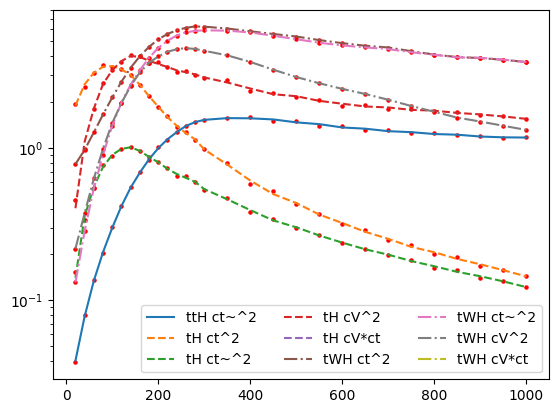

In [54]:
plt.figure()

plt.plot(tHMassGrid, ttHCoeffs_smooth, label=r"ttH ct~^2")
plt.scatter(tHMassGrid, ttHCoeffs, c='r', s=5)

plt.plot(tHMassGrid, tHCoeffs_smooth[:,0], ls='--', label=r"tH ct^2")
plt.scatter(tHMassGrid, tHCoeffs[:,0], c='r', s=5)
plt.plot(tHMassGrid, tHCoeffs_smooth[:,1], ls='--', label=r"tH ct~^2")
plt.scatter(tHMassGrid, tHCoeffs[:,1], c='r', s=5)
plt.plot(tHMassGrid, tHCoeffs_smooth[:,2], ls='--', label=r"tH cV^2")
plt.scatter(tHMassGrid, tHCoeffs[:,2], c='r', s=5)
plt.plot(tHMassGrid, tHCoeffs_smooth[:,3], ls='--', label=r"tH cV*ct")
plt.scatter(tHMassGrid, tHCoeffs[:,3], c='r', s=5)

plt.plot(tHMassGrid, tWHCoeffs_smooth[:,0], ls='-.', label=r"tWH ct^2")
plt.scatter(tHMassGrid, tWHCoeffs_smooth[:,0], c='r', s=5)
plt.plot(tHMassGrid, tWHCoeffs_smooth[:,1], ls='-.', label=r"tWH ct~^2")
plt.scatter(tHMassGrid, tWHCoeffs_smooth[:,1], c='r', s=5)
plt.plot(tHMassGrid, tWHCoeffs_smooth[:,2], ls='-.', label=r"tWH cV^2")
plt.scatter(tHMassGrid, tWHCoeffs_smooth[:,2], c='r', s=5)
plt.plot(tHMassGrid, tWHCoeffs_smooth[:,3], ls='-.', label=r"tWH cV*ct")
plt.scatter(tHMassGrid, tWHCoeffs_smooth[:,3], c='r', s=5)

plt.yscale('log')
plt.legend(ncol=3)
plt.show()

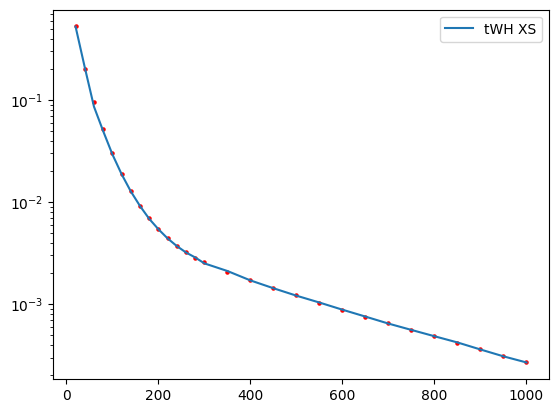

In [55]:
plt.figure()
plt.plot(tHMassGrid, tWHCxnsLHC13_smooth, label=r"tWH XS")
plt.scatter(tHMassGrid, tWHCxnsLHC13,c='r', s=5 )
plt.yscale('log')
plt.legend()
plt.show()

## Export to C++ file

In [58]:
from helpers import *

with cppDataFile(
    "../src/predictions/data/tHTables.cpp", scriptname="tools/transferttHtHtWHCxns.ipynb"
) as cppf:
    cppf.write("const auto tHMassGrid = ")
    cppf.write(grid2CppString([tHMassGrid]))
    cppf.write("const auto tHCoeffs = ")
    cppf.write(values2CppString(tHCoeffs_smooth))
    cppf.write("const auto ttHCoeffs = ")
    cppf.write(values2CppString(ttHCoeffs_smooth))
    cppf.write("const auto tWHCoeffs = ")
    cppf.write(values2CppString(tWHCoeffs_smooth))
    cppf.write("const auto tWHCxnsLHC13 = ")
    cppf.write(values2CppString(tWHCxnsLHC13_smooth))


